In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns

In [2]:
import json
import pymongo

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client['restuarant']
mycollection = db['me']

In [4]:
all_records = mycollection.find()

In [10]:
list_cursor  = list(all_records)

In [11]:
df = pd.DataFrame(list_cursor)

In [12]:
df.head()

,_id,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,6215b143754b34e60574f6e1,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,6215b143754b34e60574f6e2,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,6215b143754b34e60574f6e3,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,6215b143754b34e60574f6e4,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,6215b143754b34e60574f6e5,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
df.shape

(51717, 18)

In [14]:
df.isna().sum()

_id                                0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
df = df.drop(['_id','url','phone'],axis=1)

In [16]:
df.duplicated().sum()

43

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.dropna(how='any',inplace=True)


In [20]:
df.shape

(23395, 15)

In [21]:
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [22]:
df = df.rename(columns={'approx_cost(for two people)' : 'cost' , 'listed_in(type)' : 'type', 'listed_in(city)' : 'city'})

In [23]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [24]:
df['cost'] = df['cost'].apply(lambda x : x.replace(',',''))
df['cost'] = df['cost'].astype(float)

In [25]:
df.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [26]:
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate             object
votes            object
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [27]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
df = df[df['rate'] != 'NEW']
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
df['rate'] = df['rate'].apply(lambda x : x.replace('/5',''))
df['rate'] = df['rate'].astype(float)

### WHICH ARE FAMOUS RESTAUTRENT IN BENGALARU?

Text(0.5, 0, 'Nos of Outlets')

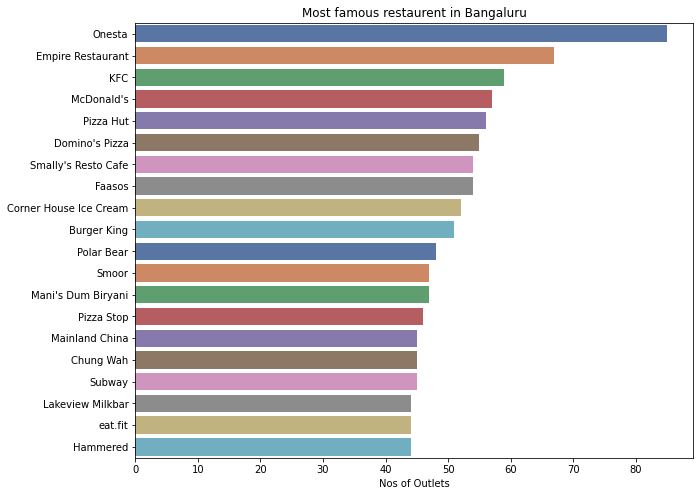

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x=df.name.value_counts()[:20],y=df.name.value_counts()[:20].index , palette="deep");
plt.title("Most famous restaurent in Bangaluru")
plt.xlabel("Nos of Outlets")

Cafe Coffe Day, Onesta, Just Bake has the most number outlets in bengaluru

### How many restaurents accept online order or not ?

In [31]:
df.online_order.value_counts()

Yes    16378
No      6870
Name: online_order, dtype: int64

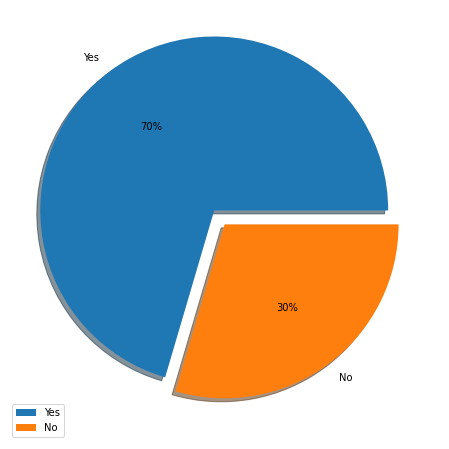

Accepting Online Orders 
 Yes    70.45
No     29.55
Name: online_order, dtype: float64


In [32]:
plt.figure(figsize=(10,8))
plt.pie(df.online_order.value_counts(),explode=[0.1,0], shadow = True, labels=['Yes','No'],autopct='%1.0f%%');
plt.legend();
plt.show();
print("Accepting Online Orders \n",round((df.online_order.value_counts()/len(df)*100),2))

Approx 41 percent restaurent doesnt consider about accepting online order .this might be cause of these restaurents cant afford to pay commision to zomato .For overcome not acccpting online restaurent, zomato consider giving some leverage or benefits if they want to increse the numbers of restaurents serving their customers online.

### How many percentage restaurents provide  vs not provide table booking?

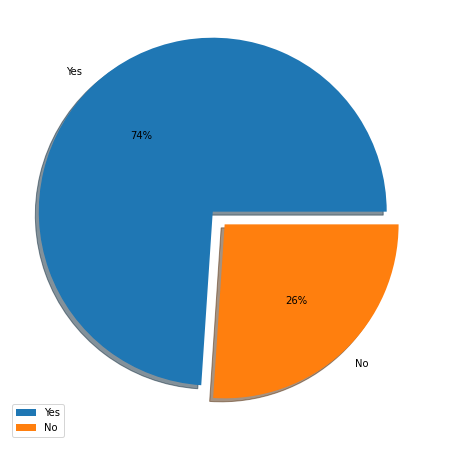

Accepting Online Orders 
 No     73.95
Yes    26.05
Name: book_table, dtype: float64


In [33]:
plt.figure(figsize=(10,8))
plt.pie(df.book_table.value_counts(),explode=[0.1,0], shadow = True, labels=['Yes','No'] , autopct='%1.0f%%');
plt.legend();
plt.show();
print("Accepting Online Orders \n",round((df.book_table.value_counts()/len(df)*100),2))

In India you cannot find table booking facility in any average restaurants,usually mostly premium restaurants provides table booking.

### Rating 

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



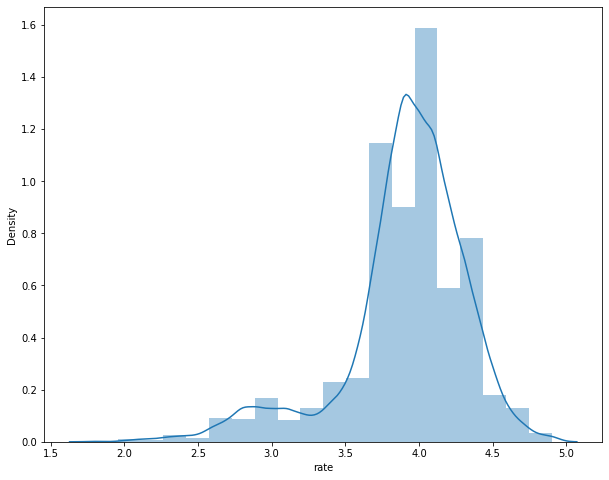

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df['rate'],bins = 20);



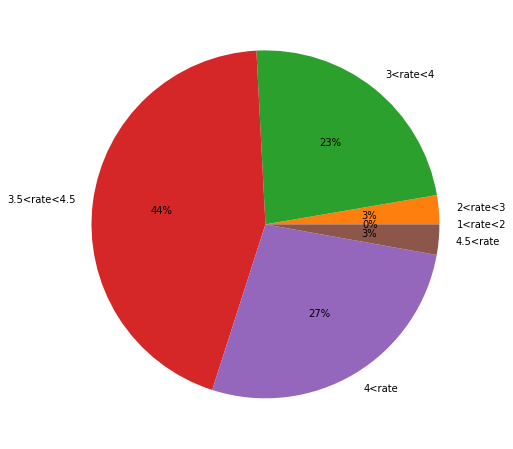

In [35]:
slices  = [((df.rate >= 1 ) & (df.rate <2 )).sum(),
            ((df.rate >= 2 ) & (df.rate <3 )).sum(),
            ((df.rate >= 3 ) & (df.rate <4 )).sum(),
            ((df.rate >= 3.5 ) & (df.rate <4.5 )).sum(),
            ((df.rate >= 4 )).sum(),
            ((df.rate >= 4.5 )).sum()]
label = ['1<rate<2','2<rate<3','3<rate<4','3.5<rate<4.5','4<rate','4.5<rate']
plt.figure(figsize=(10,8))
plt.pie(slices, labels=label, autopct='%1.0f%%')

plt.show();

Almost more than 50 percent of restaurants has rating between 3 and 4.Restaurants having rating more than 4.5 are very rare.


### COST VS RATING & COST VS VOTES

In [36]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [37]:


#Response of votes vs accepting online
votes_yes = df[df['online_order'] == 'Yes']['votes']
votes_no = df[df['online_order'] == 'No']['votes']

#response of rating vs accepting online
rating_yes = df[df['online_order'] == 'Yes']['rate']
rating_no = df[df['online_order'] == 'No']['rate']




C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



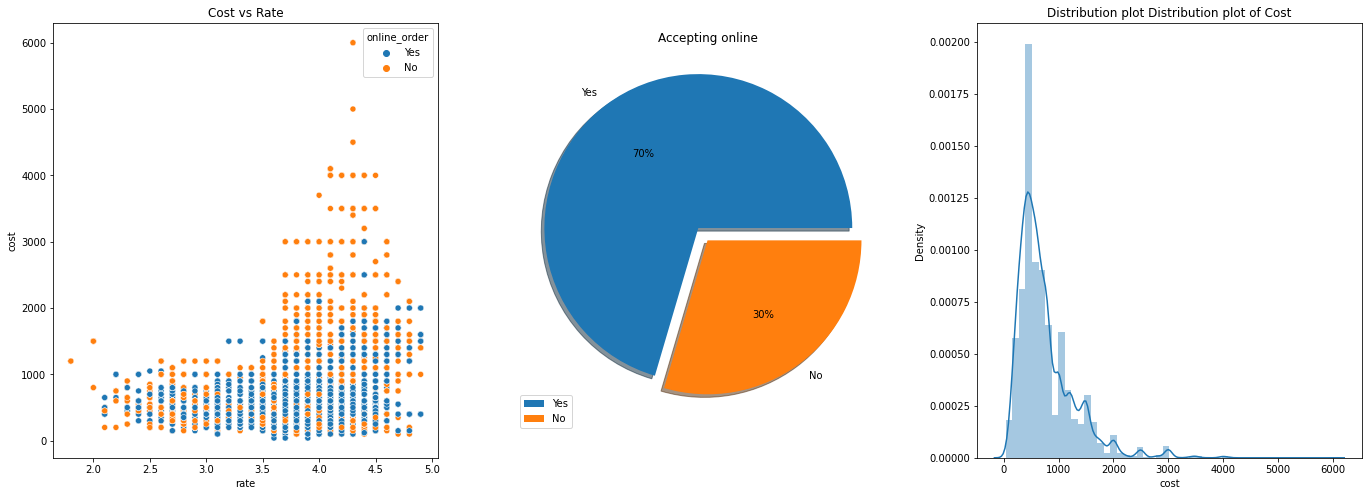

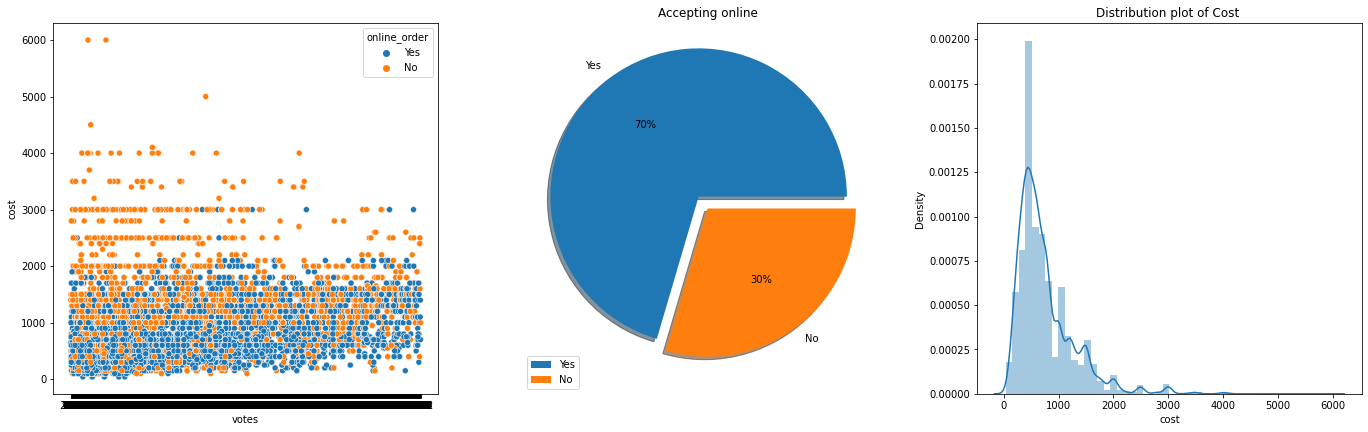

In [39]:
import plotly.graph_objects as go
plt.figure(figsize=(40,8))

plt.subplot(1, 5, 1)
plt.title("Cost vs Rate")
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df);


plt.subplot(1, 5, 2)
plt.title("Accepting online")
plt.pie(df.online_order.value_counts(),explode=[0.1,0], shadow = True, labels=['Yes','No'], autopct='%1.0f%%');
plt.legend()


plt.subplot(1, 5, 3)
sns.distplot(df['cost']);
plt.title("Distribution plot Distribution plot of Cost")


plt.figure(figsize=(40,15))
plt.title("Cost vs Votes")
plt.subplot(2, 5, 1)
sns.scatterplot(x="votes",y='cost',hue='online_order',data=df);


plt.subplot(2, 5, 2)
plt.title("Accepting online")
plt.pie(df.online_order.value_counts(),explode=[0.1,0], shadow = True, labels=['Yes','No'],autopct='%1.0f%%');
plt.legend()


plt.subplot(2, 5, 3)
sns.distplot(df['cost']);
plt.title("Distribution plot of Cost ")



trace0=go.Box(y=votes_yes,name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))

trace1=go.Box(y=votes_no,name="Not accepting online orders",
              marker = dict(
        color = 'rgb(0, 128, 128)',
    ))




layout = go.Layout(
    title = "Box Plots of votes",width=800,height=500
)

data=[trace0,trace1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)



We can see that the distribution is left skewed and almost 90percent of restaurants serve food for budget less than 1000 INR. Yes,you can observe that median number of votes for both categories vary.
Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.

### Which are the most common restaurent type?

Text(0.5, 0, 'Counts')

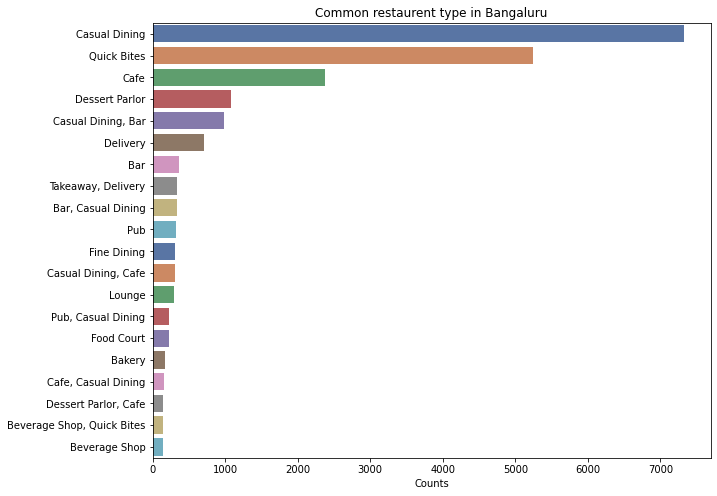

In [40]:

plt.figure(figsize=(10,8))
sns.barplot(x=df.rest_type.value_counts()[:20],y=df.rest_type.value_counts()[:20].index , palette="deep");
plt.title("Common restaurent type in Bangaluru")
plt.xlabel("Counts")

As we can see that Quick Bites major dominate restaurents.It might be consider as like people having busy and modern life and will prefer quick bites for reduce time consumption.

### Cost Factor

In [41]:
cost_fac = df['cost']
trace0=go.Box(y=cost_fac, name="accepting online orders",
              marker = dict(
        color = 'rgb(105, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

1. The median approximate cost of 400 for a single meal(for two people)
2. 50% of restaurent taking money from your pocket approx between 300 and 650.

### Best restaurents in any location (Foodies Areas)

Text(0.5, 0, 'Counts')

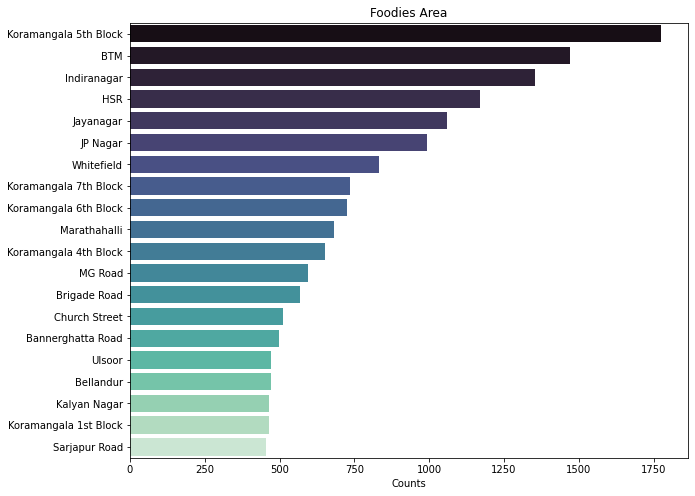

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x=df.location.value_counts()[:20],y=df.location.value_counts()[:20].index , palette="mako");
plt.title("Foodies Area")
plt.xlabel("Counts")

As we can see that BTM, HSR & KORMANGALA 5TH BLOCK are foodies areas. BTM dominates major foodies areas by having more than 5000 restaurents.

### Common cuisines in each locations

In [43]:
df_cusine = df.groupby(['location','cuisines']).agg('count')
df_cusine = df_cusine.sort_values(['name'],ascending=False).groupby(['location'],as_index=False).apply(lambda X :X.sort_values(by = 'name',ascending = False).head(3))['name'].reset_index().rename(columns={'name':'count'})
df_cusine.head(10)

,level_0,location,cuisines,count
0,0,BTM,"North Indian, Chinese",86
1,0,BTM,North Indian,86
2,0,BTM,Cafe,42
3,1,Banashankari,"North Indian, Chinese",30
4,1,Banashankari,South Indian,25
5,1,Banashankari,"South Indian, North Indian, Chinese",17
6,2,Banaswadi,"Cafe, Fast Food",10
7,2,Banaswadi,South Indian,9
8,2,Banaswadi,Chinese,7
9,3,Bannerghatta Road,"North Indian, Chinese",58


### Most Popular cuisines in banglore?

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



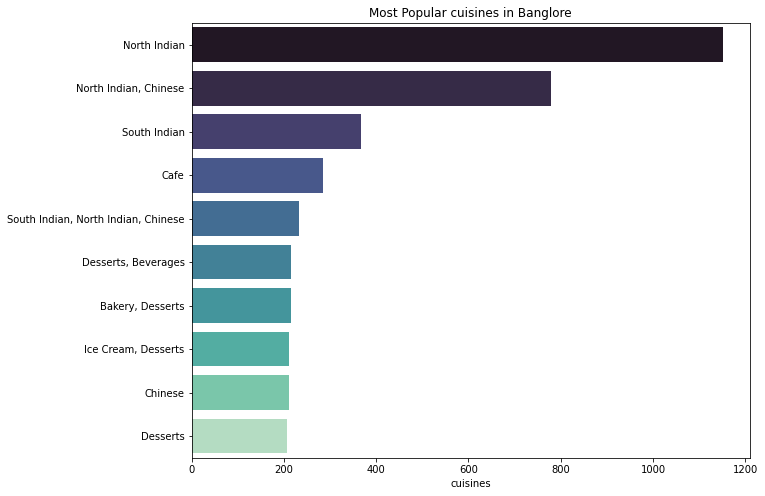

In [44]:
plt.figure(figsize=(10,8))
cuisine = df['cuisines'].value_counts()[:10]
plt.title("Most Popular cuisines in Banglore")
sns.barplot(cuisine,cuisine.index,palette="mako");

We can observe that North Indian,chinese,South Indian and Biriyani are most common. banglore more influenced by North indian culture food and as well indicate resides of north indian people.

## Most liked dishes  in banglore

In [45]:
import re

likes  = []
for i in range(df.shape[0]):

    try:
        array_split =re.split(',',df['dish_liked'][i])

        for item in array_split:

            likes.append(item)

    except KeyError:
        continue


    

In [46]:
df.shape

(23248, 15)

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



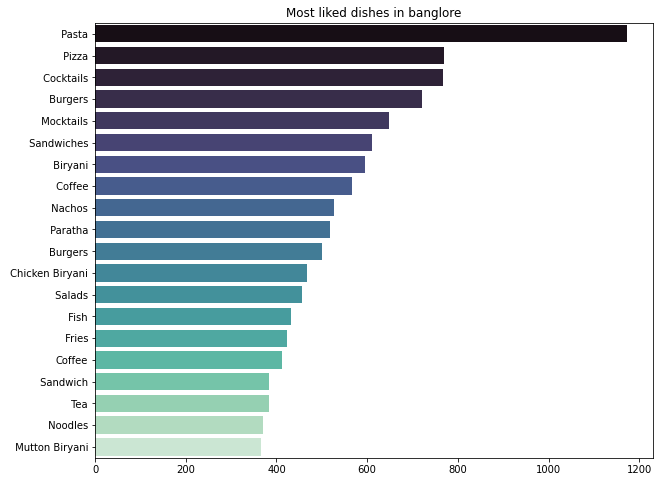

In [47]:

fav_food = pd.Series(likes).value_counts()[:20]
plt.figure(figsize=(10,8))
plt.title("Most liked dishes in banglore")
sns.barplot(fav_food,fav_food.index,palette="mako");

## Services type

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



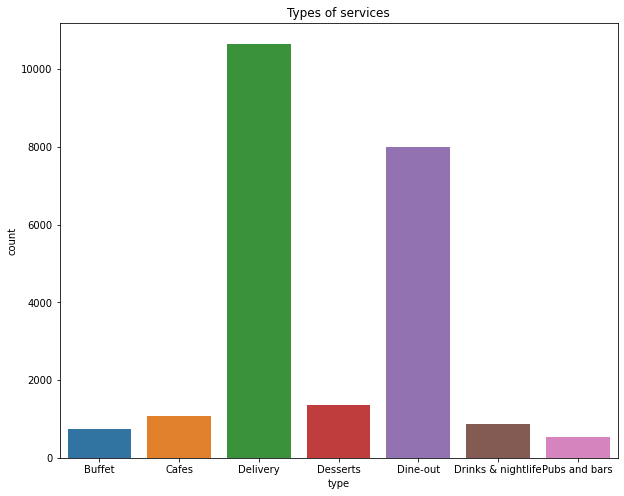

In [48]:
plt.figure(figsize=(10,8))
plt.title("Types of services")
sns.countplot(df['type']);

## Top restaurent chains

In [49]:
df.rest_type.value_counts()[:10]

Casual Dining         7326
Quick Bites           5250
Cafe                  2375
Dessert Parlor        1083
Casual Dining, Bar     985
Delivery               704
Bar                    358
Takeaway, Delivery     342
Bar, Casual Dining     336
Pub                    324
Name: rest_type, dtype: int64

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\VAISHNO RAIZADA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

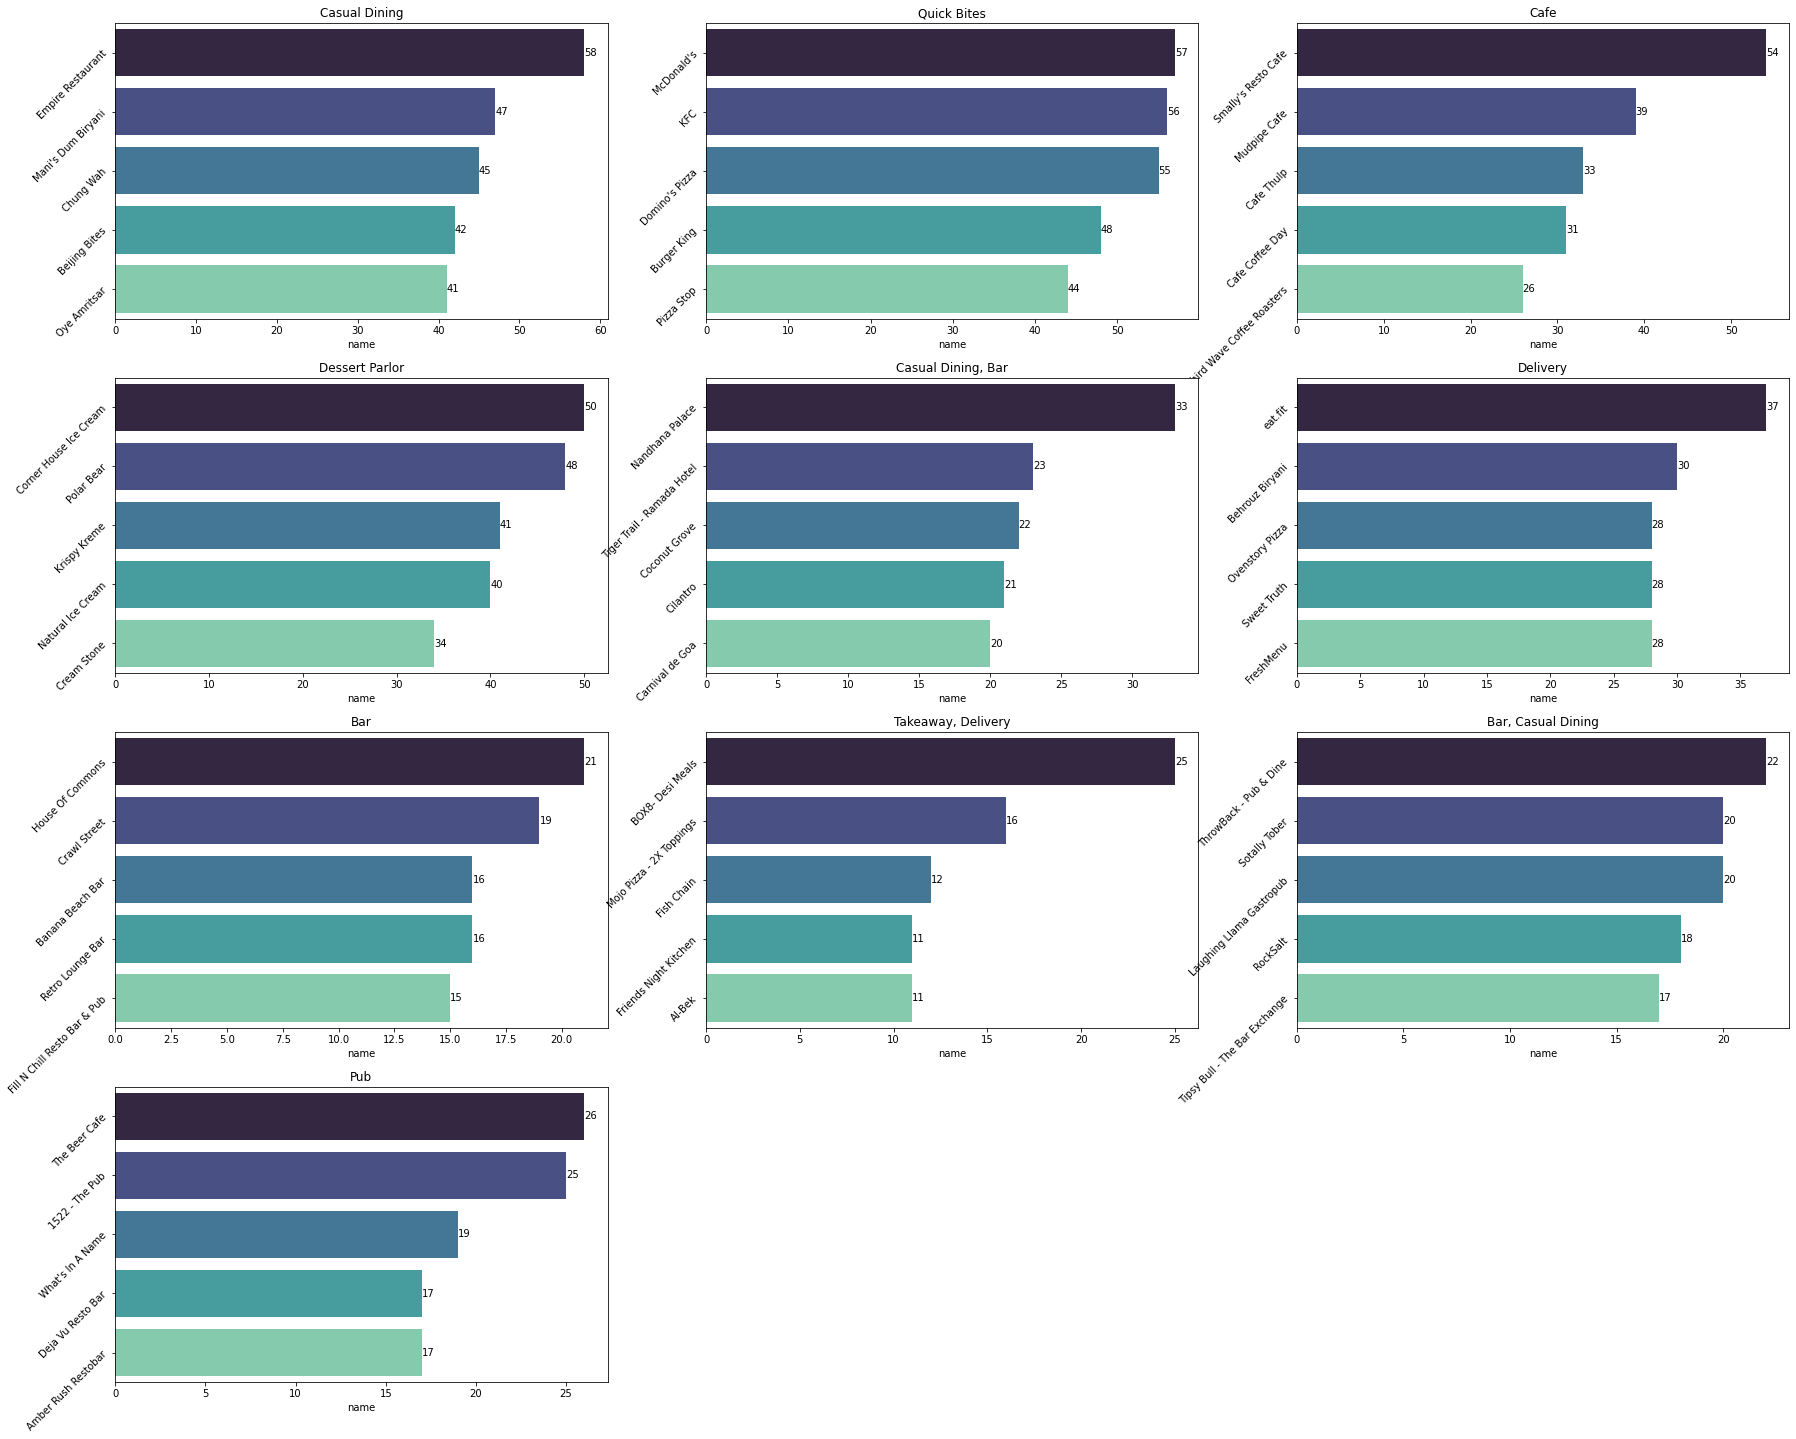

In [50]:
rest = df.rest_type.value_counts()[:10].index

def barplot_rest(rest):

    plt.figure(figsize=(30,25))

    for i , r in enumerate(rest):
        plt.subplot(4,3,i+1)
        
        
        rest_types = df[df['rest_type'] == r]['name']
        plt.title(r)
        plt.yticks(rotation=45, ha='right')
        ax = sns.barplot(rest_types.value_counts()[:5],rest_types.value_counts()[:5].index,palette="mako")
        ax.bar_label(ax.containers[0])
        

barplot_rest(rest)


    